<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01332636/blob/main/Actividad_Semanal_6%2C_visualizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Actividad Semanal 6, visualización
##Datos Generales

Nombre: Estefania Abigail Castro Belmont

Matrícula: A01332636

Materia: Ciencia y analítica de datos

Profesor: María de la Paz Rico Fernández

Tutor: Julio César Galindo López

Fecha: 1/11/2022


##Redacción del Notebook
 1. El nombre del conjunto de datos: 
 
 default of credit card clients. 
 2. Describe el conjunto de datos. 

 Este conjunto de datos consta de los siguientes attributos:
 X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

X2: Gender (1 = male; 2 = female).

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

X4: Marital status (1 = married; 2 = single; 3 = others).

X5: Age (year).

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.

X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

Con ellos se busca crear un modelo capaz de precedir con exactitud la credibilidad del cliente para poder otorgarle crédito.

 4. Código 
 5. Conclusión

En el ejercicio logramos ver que las variables cualitativas nos dejan conocer la forma en que se distribuye la cantidad de crédito otorgado a cada persona o segmento de personas. Por su parte, las variables cuantitativas que nos dan información sobre la calificación crediticia, la cantidad pagada y la cantidad del estado de cuenta actual nos ayuan a comprender los movimientos de cuenta que se tienen dentro del banco. Más aún, podemos conocer cómo se distribuyen estos datos. También nos damos cuenta de que estas variables que corresponden a meses consecutivos, especialmente la calificación y el estado de cuenta actual, llegan a tener una correlación alta, por lo que al realizar un PCA podemos reducir nuestro conjunto de datos. Al final con las gráficas logramos visualizar cuál es el comportamiento que se tiene en nuestros datos, la estratégia que el banco tiene para aprobar créditos y el segmento de personas al que está inclinado a ofrecerle un mayor crédito.  

##Conjunto de Datos

In [1]:
path = "https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv"

In [2]:
#importamos librerías
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
plt.style.use('ggplot')

In [3]:
#Leemos el df
df = pd.read_csv(path)
df

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


##Información del DataFrame

In [4]:
#Vemos la forma del df
df.shape

(30000, 25)

In [5]:
#nos familiarizamos con las columnas
df.columns

Index(['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [6]:
#Vemos las primeras filas del df
df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [7]:
#Vemos los tipos de datos del df
df.dtypes

ID       int64
X1       int64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
Y      float64
dtype: object

In [8]:
#Vemos la info del df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30000 non-null  int64  
 1   X1      30000 non-null  int64  
 2   X2      29999 non-null  float64
 3   X3      29998 non-null  float64
 4   X4      29998 non-null  float64
 5   X5      29995 non-null  float64
 6   X6      29997 non-null  float64
 7   X7      29995 non-null  float64
 8   X8      29993 non-null  float64
 9   X9      29991 non-null  float64
 10  X10     29984 non-null  float64
 11  X11     29986 non-null  float64
 12  X12     29989 non-null  float64
 13  X13     29989 non-null  float64
 14  X14     29987 non-null  float64
 15  X15     29985 non-null  float64
 16  X16     29983 non-null  float64
 17  X17     29990 non-null  float64
 18  X18     29992 non-null  float64
 19  X19     29991 non-null  float64
 20  X20     29992 non-null  float64
 21  X21     29989 non-null  float64
 22

In [9]:
#Vemos los booleanos de valores que están vacios
df.isna()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


##Registros Nulos

In [10]:
#Hacemos una suma de valores nulos por columna
sd=pd.DataFrame(df.isna().sum())
sd

,0
ID,0
X1,0
X2,1
X3,2
X4,2
X5,5
X6,3
X7,5
X8,7
X9,9


In [11]:
#Copiamos nuestro df original para evitar modificarlo
ndf = df.copy()

In [12]:
#Porcentaje de datos faltantes
Datos_faltantes=np.sum(sd[0])
porcentaje = np.sum(sd[0])/df.shape[0]*100
Dos_porcentaje = "{:.2f}".format(porcentaje)
print("Datos faltantes:",Datos_faltantes,"\n" ,"Esto es un: ",Dos_porcentaje,"%")

Datos faltantes: 196 
 Esto es un:  0.65 %


In [13]:
#Eliminamos loas filas que tienen más del 50% de sus valores vacios. 
ndf.dropna(thresh=(13), inplace = True)
ndf.shape

(29992, 25)

In [14]:
#Volvemos a sumar los registros vacios por columna
for col in ndf:
  if (ndf[col].isna().sum() != 0):
    print(col, ndf[col].isna().sum())

X5 3
X7 2
X8 4
X9 6
X10 10
X11 8
X12 3
X13 3
X14 5
X15 7
X16 9
X17 3
X18 1
X19 2
X20 1
X21 4
X22 4
X23 3
Y 1


In [15]:
#Bucamos el registro específico de Y que está vacio
x=ndf['Y'].isnull()
x
ndf[x]

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
6232,6233,60000,2.0,2.0,2.0,29.0,2.0,2.0,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#Eliminamos la fila donde el dato target "Y" es nulo
ndf = ndf.drop(6232)

In [17]:
#Creamos una lista con los valores vacios
missings=[]
for col in ndf:
  if (ndf[col].isna().sum() != 0):
    print(col, ndf[col].isna().sum())
    missings.append(col)

X5 3
X7 2
X8 4
X9 6
X10 10
X11 8
X12 3
X13 3
X14 4
X15 6
X16 8
X17 2
X19 1
X21 3
X22 3
X23 2


In [18]:
#Modificamos los datos nulos por su mediana
for col in missings: 
  ndf[col] = ndf[col].fillna(ndf[col].median())

In [19]:
#Verificamos que ya no haya datos nulos
ndf.isna().values.any()

False

##Estadística Descriptiva

In [20]:
#Imprimomos las estadísticas descriptivas básicas de las columnas hasta la 17 porque si no 
#es así no vemos todos los valores
print(ndf.iloc[:,1:18].describe().round(2))

               X1        X2        X3        X4        X5        X6        X7  \
count    29991.00  29991.00  29991.00  29991.00  29991.00  29991.00  29991.00   
mean    167494.24      1.60      1.85      1.55     35.48     -0.02     -0.13   
std     129739.16      0.49      0.79      0.52      9.22      1.12      1.20   
min      10000.00      1.00      0.00      0.00     21.00     -2.00     -2.00   
25%      50000.00      1.00      1.00      1.00     28.00     -1.00     -1.00   
50%     140000.00      2.00      2.00      2.00     34.00      0.00      0.00   
75%     240000.00      2.00      2.00      2.00     41.00      0.00      0.00   
max    1000000.00      2.00      6.00      3.00     79.00      8.00      8.00   

             X8        X9       X10       X11        X12        X13  \
count  29991.00  29991.00  29991.00  29991.00   29991.00   29991.00   
mean      -0.17     -0.22     -0.27     -0.29   51234.31   49188.17   
std        1.20      1.17      1.13      1.15   73643.31 

In [21]:
#Imprimimos las estadísticas descriptivas básicas faltantes
print(ndf.iloc[:,18:25].describe().round(2))

             X18         X19        X20        X21        X22        X23  \
count   29991.00    29991.00   29991.00   29991.00   29991.00   29991.00   
mean     5663.08     5922.51    5225.74    4826.91    4800.09    5216.91   
std     16564.42    23044.17   17608.70   15668.26   15280.35   17779.94   
min         0.00        0.00       0.00       0.00       0.00       0.00   
25%      1000.00      835.50     390.00     296.50     252.00     118.00   
50%      2100.00     2009.00    1800.00    1500.00    1500.00    1500.00   
75%      5006.00     5000.00    4506.00    4013.50    4032.00    4000.00   
max    873552.00  1684259.00  896040.00  621000.00  426529.00  528666.00   

              Y  
count  29991.00  
mean       0.22  
std        0.42  
min        0.00  
25%        0.00  
50%        0.00  
75%        0.00  
max        1.00  


###Explicación

'ID':La columna ID es solamente para identificar los datos, por lo que su estadística nos nos brinda mucha información. Solo podemos saber que se tienen 29,991 registros.

'X1': podemos ver que la mediana es de 140,000, y el promedio de 167,494 por lo que podemos asumir que hay algún número extremo positivo que jaló el promedio hacia la dercha. Además tienen una desviación estándar de 129,739.   

'X2': Esta es una variable categórica en la que se diferencia el género de las personas. La descripción no nos deja conocer mucho de los datos por lo mismo. Quizá lo más interesante es que la mediana está en el número 2 y llega hasta el máximo, lo cuál podría hacer de este número el más grande dentro de las dos categorías. 

'X3': De nuevo esta variable es e datos categóricos; no obstante, como el valor 2 va del 50% al 75% y el máximo es 6, podemos inferir que los números del 3 al 6 están englobados en el último cuartil, lo cuál los convierte en las categorías con menos repeticion en nuestra variable X3 (educación). 

'X4': De nuevo tenemos una variable de categoría, esta ocasion sobre matrimonio. 2 significa soletro, mientras que 1 casado. 2 va del 50% al 75% y ya en el máximo tenemos 3 (otro)

'X5': en esta variable vemos la edad de las personas. El mínimo es de 21 años y el máximo 79, la mediana se encuentra en los 34 años y la media en los 35, por lo que nuestros datos no están muy sesgados, aunque sí un poco hacia la derecha.

'X6'-'X11': Estas variables son sobre el historial de pagos pasados. Los bancos suelen categorizar los pagos como -1 si hay adeudo, 0 si no lo hay. No obstante, en nuestros datos tenemos el máximo de 8 y mínimo de -2. En el score crediticio de FICO los valores también llegan a 8, lo que nos hace pensar que el banco está calificando con 8 a lo que son muy buenos pagados y con -2 a los que no pagan. Es interesante que en las 6 variables se mantienen los mismos valores en todos los cuartiles, lo que nos deba ver que en todos los meses tuvieron resultados muy similares. Lo que cambia es la desviación estandar y el promedio. La desviación estándar nos indica que las variables tuvieron distintas disperciones dentro de sus valores, siendo 1.12 la mínima y 1.197 la máxima, lo que nos da un rango de 0.077. Por su parte el promedio  llama su atención porque es negativo en todas las variables, mientras que el cuartil 50% se encuentra justo en el 0, esto nos indica que los datos tienen un sesgo negativo. Como los valores van de -2 a 8 y el cuartil 50% está en el 0 con la media en números un poco inferiores a 0 y el 75% de los datos en 0, podemos inferir que la mayoría de los clientes del banco o bien pagaron a tiempo o son deudores, ya que los valores mayores a 0 terminan siendo datos anómalos (sus buenos pagadores son raros). 

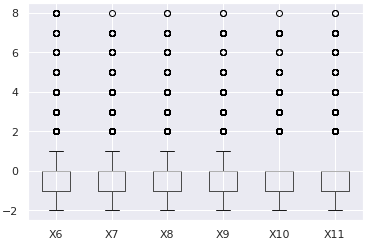

'X12'-'X17': Estas variables son sobre la cantidad del estado de cuenta, siendo X17 la categoría de abril y X12 la de septiembre. Por los datos podemos ver que la cantidad de la media fue subiendo conforme los meses pasaron. en X14 fue cuando se alcanzó el mayor máximo de todos los meses, mientras que en X15 se alcanzó el mayor mínimo. También llama la atención que los valores que van del cuartil 25% al mínimo parecieran tener una diferencia más grande que de la mediana al máximo. Sin embargo la desviación estándar es muy similar en todos los meses (el mínimo en X17 con 59,560 y el máximo con 73,643 en X12). 
 
'X18'-'X23': Estas variables son sobre la cantidad del pago previo. Como vemos estos van aumentando conforme pasa el tiempo. Esto lo notamos en la mediana.  También podemos observar que el mínimo se mantiene en 0 en todos los meses. La desviación estándar también llega a variar un poco, pues tiene un rango de 7,764.

'Y': Finalmente Y es nuestra varuable de salida (si se les otorgó el crédito o no). Por lo que vemos la mayoría de los casos (hasta el cuartil 75% tiene el 0 de no otorgado). En realidad son la minoría los que tienen el crédito aprobado.  

##Conteo de variables y escalamiento

In [22]:
#Contamos los valores de las columnas categóricas
categoricas = ["X2","X3","X4", "X5","Y"]

#X1: Amount of the given credit (NT dollar)
#X2: Gender (1 = male; 2 = female). 
#X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
#X4: Marital status (1 = married; 2 = single; 3 = others)
#X4: Age. 

for variable in categoricas:
  print(variable,"\n", ndf[variable].value_counts())

X2 
 2.0    18111
1.0    11880
Name: X2, dtype: int64
X3 
 2.0    14026
1.0    10583
3.0     4914
5.0      280
4.0      123
6.0       51
0.0       14
Name: X3, dtype: int64
X4 
 2.0    15962
1.0    13652
3.0      323
0.0       54
Name: X4, dtype: int64
X5 
 29.0    1603
27.0    1477
28.0    1409
30.0    1395
26.0    1256
31.0    1217
25.0    1186
34.0    1165
32.0    1158
33.0    1146
24.0    1127
35.0    1113
36.0    1108
37.0    1040
39.0     954
38.0     943
23.0     931
40.0     869
41.0     822
42.0     794
44.0     700
43.0     669
45.0     617
46.0     570
22.0     560
47.0     498
48.0     466
49.0     451
50.0     411
51.0     340
53.0     325
52.0     304
54.0     247
55.0     209
56.0     178
58.0     122
57.0     122
59.0      83
60.0      67
21.0      67
61.0      56
62.0      44
63.0      31
64.0      31
66.0      25
65.0      24
67.0      16
69.0      15
70.0      10
68.0       5
73.0       4
72.0       3
75.0       3
71.0       3
79.0       1
74.0       1
Name: X5, dtyp

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9032328710>]],
      dtype=object)

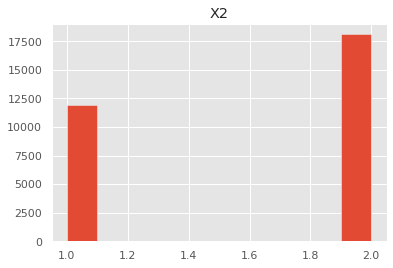

In [23]:
#Vemos un histograma del género vs crédito otorgado
genero=pd.DataFrame(data=ndf, columns=["X1","X2"])
genero.set_index('X1', inplace=True)
genero.head()

genero.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f90332feb90>]],
      dtype=object)

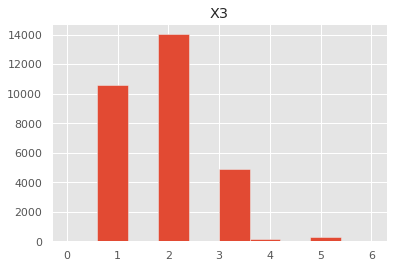

In [24]:
#Vemos un histograma del nivel educativo vs crédito otorgado
educacion=pd.DataFrame(data=ndf, columns=["X1","X3"])
educacion.set_index('X1', inplace=True)
educacion.head()

educacion.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9031d56cd0>]],
      dtype=object)

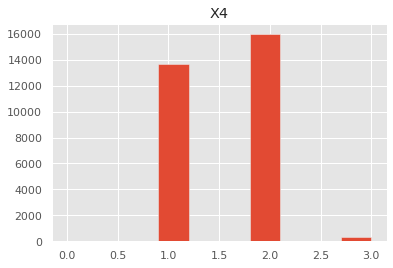

In [25]:
#Vemos un histograma del estado civil vs crédito otorgado
matrimonio=pd.DataFrame(data=ndf, columns=["X1","X4"])
matrimonio.set_index('X1', inplace=True)
matrimonio.head()

matrimonio.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9031c758d0>]],
      dtype=object)

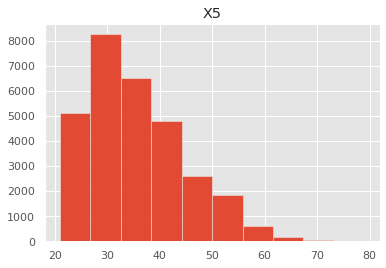

In [26]:
#Vemos un histograma de la edad vs crédito otorgado
edades=pd.DataFrame(data=ndf, columns=["X1","X5"])
edades.set_index('X1', inplace=True)
edades.head()

edades.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9031c1fd50>]],
      dtype=object)

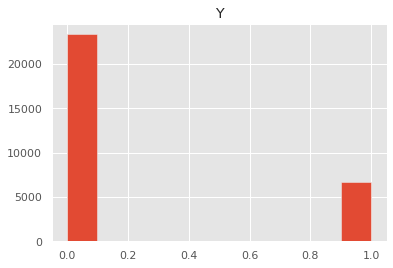

In [27]:
#Vemos un histograma de la aprobación de crédito vs crédito otorgado
credito_aprobado=pd.DataFrame(data=ndf, columns=["X1","Y"])
credito_aprobado.set_index('X1', inplace=True)
credito_aprobado.head()

credito_aprobado.hist()

##PCA

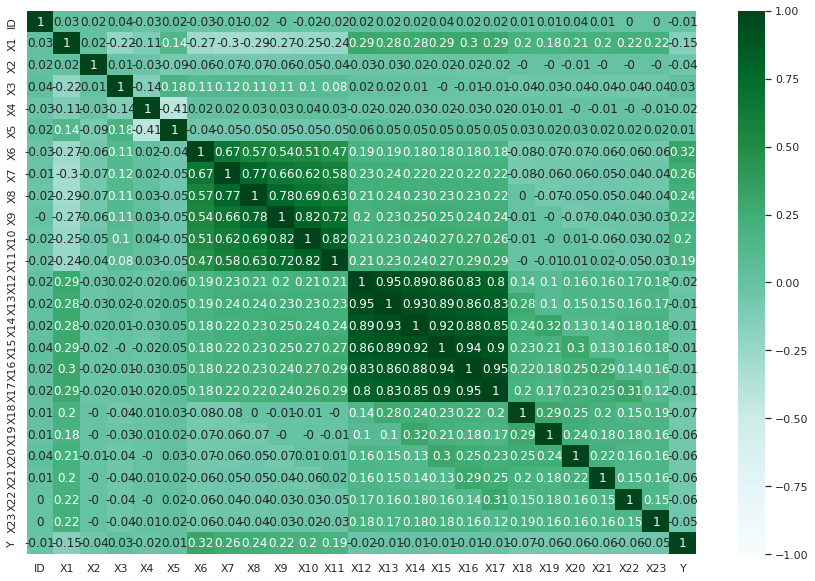

In [28]:
import seaborn as singular_values_
correlacion = ndf.corr().round(2)

sns.set(rc= {"figure.figsize":(15,10)})
sns.heatmap(correlacion, vmin = -1, vmax = 1, cmap = "BuGn", annot = True)

In [29]:
#Separamos nuestros valores de la variable target
features=ndf[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23']]
target = ndf[['Y']]

In [30]:
# Cargamos la data

X = features
y = target
# Z-score the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
# The PCA model
pca = PCA(n_components=23) # estimate only 2 PCs
X_new = pca.fit_transform(X) # project the original data into the PCA space

In [31]:
#HAcemos el fit a PCA
#from sklearn import preprocessing
#pca = PCA()
#pca.fit(preprocessing.scale(ndf))
#X_new=pd.DataFrame(X_new)

In [32]:
#Vemos el resumen de desviación estándar, proporción de varianza y la proporción acumulada 
summary = {'Standard deviation': np.sqrt(pca.explained_variance_),
                          'Proportion of variance': pca.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pca.explained_variance_ratio_)#column 
                          }
pcaSummary = pd.DataFrame(summary).transpose()
pcaSummary = pcaSummary.round(2)
pcaSummary

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
Standard deviation,2.56,2.02,1.25,1.21,1.01,0.98,0.95,0.94,0.93,0.88,...,0.72,0.64,0.51,0.50,0.43,0.36,0.26,0.2,0.16,0.15
Proportion of variance,0.28,0.18,0.07,0.06,0.04,0.04,0.04,0.04,0.04,0.03,...,0.02,0.02,0.01,0.01,0.01,0.01,0.00,0.0,0.00,0.00
Cumulative proportion,0.28,0.46,0.53,0.59,0.64,0.68,0.72,0.76,0.80,0.83,...,0.94,0.96,0.97,0.98,0.99,0.99,1.00,1.0,1.00,1.00


In [33]:
#Volvemos a visualizar en un dataframe los componentes y variables 
ndf=df.copy()
ndf=ndf.iloc[:,1:24]
pcaSummary.columns = ["PC{}".format(i) for i in range(1,len(pcaSummary.columns)+1)]
pcaSummary.columns

pcsCompsDF = pd.DataFrame(pca.components_.transpose(),
                          columns = pcaSummary.columns,
                          index = ndf.columns )
pcsCompsDF.iloc[:,:7].round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
X1,0.0686,0.3164,0.0175,0.0698,-0.1489,-0.3758,0.1059
X2,-0.0217,0.0305,0.0237,-0.0776,0.8847,-0.3942,0.0640
X3,0.0192,-0.0916,-0.3160,0.2472,0.3636,0.5661,-0.3996
X4,-0.0056,-0.0433,0.4527,-0.4451,-0.0535,0.2798,-0.1596
X5,0.0142,0.0666,-0.4620,0.4631,-0.1642,-0.0888,0.0815
X6,0.1611,-0.2982,-0.0174,0.0161,-0.0350,-0.0400,-0.0865
X7,0.1941,-0.3349,0.0179,0.0500,-0.0375,-0.0611,-0.0920
X8,0.2002,-0.3438,0.0616,0.0839,-0.0234,-0.0699,-0.0214
X9,0.2070,-0.3446,0.0890,0.1093,-0.0075,-0.0874,0.0394
X10,0.2109,-0.3316,0.1089,0.1155,0.0020,-0.0870,0.1039


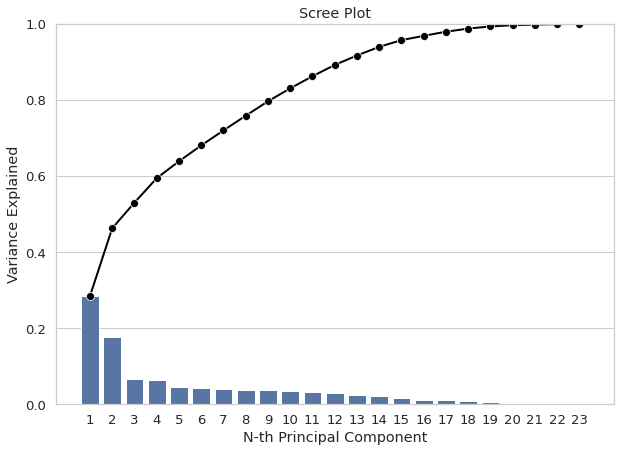

In [34]:
#Graficamos el resumen para ver cómo se comportan los datos
PC_components = np.arange(pca.n_components_) + 1
cusm = np.cumsum(pca.explained_variance_ratio_)
vartio = pca.explained_variance_ratio_

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pca.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pca.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

In [35]:
#Vemos el ratio de varianza explicada
print(pca.explained_variance_ratio_)

[0.28448163 0.1781645  0.06743675 0.06399698 0.04457816 0.04161726
 0.0394625  0.03859202 0.03787997 0.0340396  0.03185793 0.02969963
 0.02482286 0.02280097 0.01756054 0.01129413 0.01083542 0.00821309
 0.00573191 0.0030504  0.00177386 0.00110034 0.00100955]


In [36]:
#Creamos una nueva variable con los datos transformados
#ndf=df.copy()
pca = PCA(n_components=7) 
X_new = pca.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  This is separate from the ipykernel package so we can avoid doing imports until


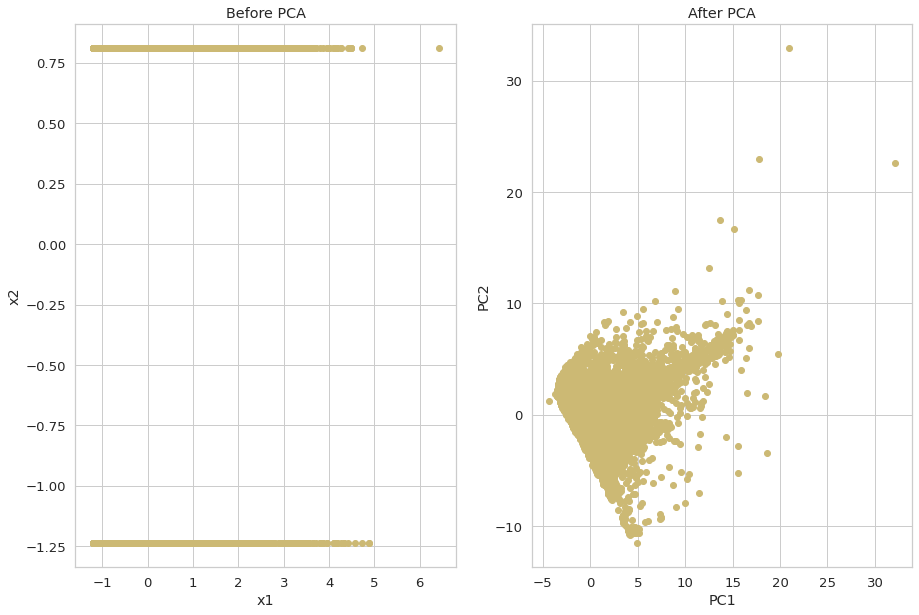

In [37]:
#Graficamos el antes y después del PCA
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

In [38]:
#Vemos la covarianza de las nuevas variables
np.cov(X_new.T)

array([[ 6.54329574e+00, -4.73853108e-17, -2.08495368e-17,
        -4.07513673e-17,  4.04255933e-18,  8.52935595e-17,
         2.17972430e-17],
       [-4.73853108e-17,  4.09792005e+00, -4.39735684e-16,
        -1.40260520e-16,  4.02775142e-17, -3.87374916e-17,
        -2.08495368e-17],
       [-2.08495368e-17, -4.39735684e-16,  1.55109694e+00,
         5.11761357e-16,  1.88652769e-16,  3.91195357e-16,
         5.54408137e-17],
       [-4.07513673e-17, -1.40260520e-16,  5.11761357e-16,
         1.47197960e+00, -7.81857629e-16, -3.43780430e-16,
         4.35944860e-17],
       [ 4.04255933e-18,  4.02775142e-17,  1.88652769e-16,
        -7.81857629e-16,  1.02532834e+00,  3.99102780e-16,
        -2.72465537e-16],
       [ 8.52935595e-17, -3.87374916e-17,  3.91195357e-16,
        -3.43780430e-16,  3.99102780e-16,  9.57228525e-01,
         2.50194441e-16],
       [ 2.17972430e-17, -2.08495368e-17,  5.54408137e-17,
         4.35944860e-17, -2.72465537e-16,  2.50194441e-16,
         9.0766413

In [39]:
#Vemos la varianza exmplicada del PCA
pca.explained_variance_

array([6.54329574, 4.09792005, 1.55109694, 1.4719796 , 1.02532834,
       0.95722852, 0.90766413])

In [40]:
#Imprimimos los componentes absolutos del PCA
print(abs( pca.components_ ))

[[0.06856782 0.02170132 0.01922221 0.00563585 0.01424202 0.16107331
  0.19409658 0.20022214 0.20703031 0.21087834 0.2063485  0.33440138
  0.3458141  0.34979155 0.353898   0.35175488 0.34452552 0.09424726
  0.07868229 0.0864106  0.07780268 0.07536679 0.06994937]
 [0.31637644 0.03053259 0.0916053  0.0432785  0.06661798 0.2981663
  0.33489346 0.34379042 0.34458137 0.33161571 0.30579946 0.13976168
  0.14017177 0.14616818 0.14539998 0.14373892 0.14182973 0.14914071
  0.13988014 0.15156617 0.14140983 0.13717768 0.12939672]
 [0.01751725 0.02372123 0.31603787 0.45271928 0.46198821 0.01742065
  0.01788194 0.06158315 0.08902563 0.10888673 0.11110521 0.15099454
  0.12714652 0.08399351 0.07062135 0.05668619 0.04770015 0.28226601
  0.30211508 0.2805797  0.23765055 0.19444806 0.2094368 ]
 [0.0697558  0.07758269 0.24717076 0.44507323 0.46309905 0.0160926
  0.04999641 0.08390163 0.10928242 0.11551671 0.10980799 0.1677151
  0.14914818 0.10466954 0.10056954 0.08876403 0.08406784 0.27996361
  0.310831   

In [41]:
#Vemos la correlación de dos variables
np.corrcoef(X[:,2], X[:,3])[1,0]

-0.1433469286199168

In [42]:
#Vemos el coeficinete de correlación de dos variables
np.corrcoef(X[:,1], X[:,2])[1,0]

0.014345344707156293

In [43]:
#Vemos el df creado con el PCA
vis = pd.DataFrame(X_new)
vis

,0,1,2,3,4,5,6
0,-1.888044,-0.906449,-0.488492,-0.537727,0.994980,0.045695,-0.625603
1,-0.765007,-2.109715,1.097353,-0.482752,0.863181,-0.235518,0.067382
2,-0.847609,-1.072572,0.411435,-0.432914,0.770479,0.019884,-0.150810
3,-0.196778,-0.809485,-0.818507,0.295013,0.910153,-0.283905,0.235144
4,-0.841131,-0.072499,-1.002929,2.328907,-1.025207,0.792598,0.713980
...,...,...,...,...,...,...,...
29986,2.523289,0.691817,-1.655287,0.502690,-0.474629,1.383324,-0.292324
29987,-1.775203,-0.051129,-0.414431,0.527393,-0.681445,1.634864,-0.235321
29988,0.357618,-3.313792,0.611219,0.469998,-1.238768,0.737026,-0.632599
29989,0.650610,0.722462,0.525969,2.882061,-0.248300,1.616652,-1.809027


##Visualización

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


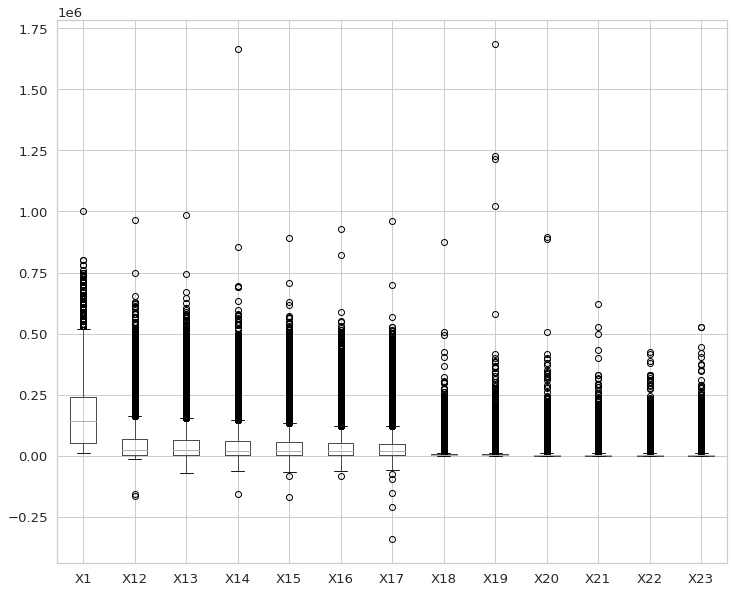

In [44]:
#Graficamos un boxplot
cat=['X1', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23']
width = 12
height = 10
plt.figure(figsize=(width, height))
ndf.boxplot(column = cat)

###Interpretación boxplot
En este gráfico podemos ver la distribución de las variables concernientes a los montos de crédito. Podemos ver la distribución del crédito que tienen, la de la cantidad del estado de cuenta y la dispersión de la cantidad del pago anterior. Aquí se nota que las cantidades del estado de cuenta (X12:X17)son similares con outlieres superiores (siendo el mayor el de X13). También vemos que hay varios outliers inferiores, siendo en X17 dónde se encuentra menor outlier. Por su parte las cantidades de los pagos anteriores mantienen su caja muy pegada al 0 en comparación con el resto de nuestras variables, aunque los outliers se mantienen. En x1 (la cantidad de crédito otorgada) podemos ver cuál es la dispersión de los créditos. Podemos ver que las variables que tienen las cajas más pequeñas son las de la cantidad del pago previo.
Esta información nos puede ayudar a conocer cómo se comportan los usuarios en cuanto a sus pagos y estados de cuenta y qué tanto varia su comportamiento en los tres tipos de información (créditos ortografos, estado de cuenta actual y pago previo). 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f902d2d7a50>]],
      dtype=object)

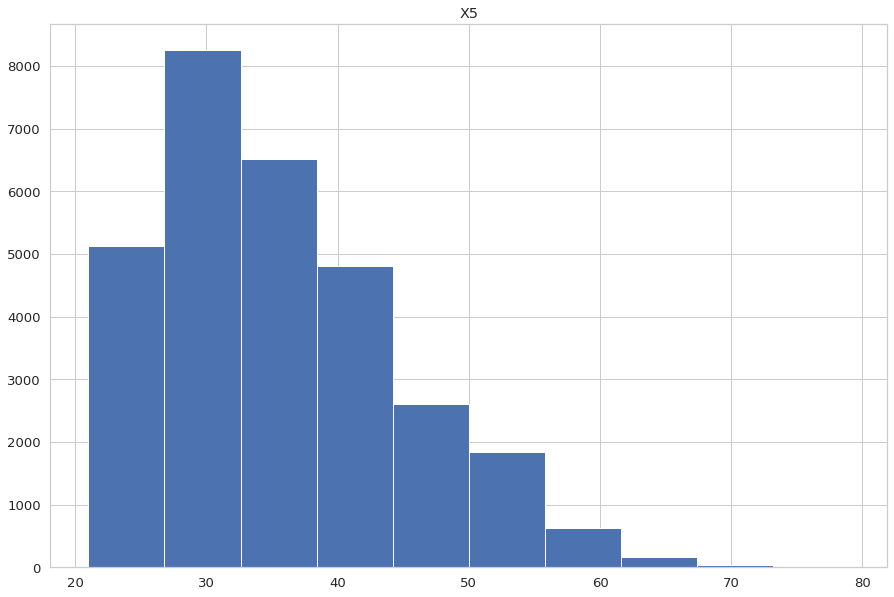

In [45]:
#Graficamos un histograma
edad=pd.DataFrame(data=ndf, columns=["X1","X5"])
edad.set_index('X1', inplace=True)
edad.head()

edad.hist()

###Interpretación histograma
En este histograma podemos ver la cantidad de créditos otorgados contra la edad de los usuarios. Nos ayuda a visualizar la edad de los usuarios con el mayor crédito y la edad de los que tienen menor crédito para saber así quienes son los a los que más se les presta dinero y que tienen más posibilidades de pagar o no sus créditos o si se debería hacer un cambio de estrategia dentro de la cantidad de crédito que se le ortogra a cada grupo de personas. La información más relevante de este gráfico es el conocer quien es nuestro segmento de mercado con mayor crédito y así crear estrategias para ver si esta decisión es la mejor. 

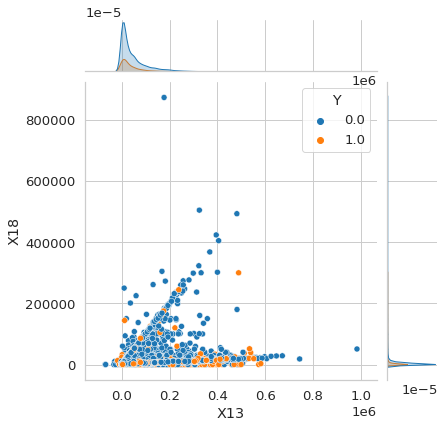

In [101]:
sns.jointplot(data=df, x="X13", y="X18", hue="Y",palette=['tab:blue', 'tab:orange'] )

###Interpretación jointplot

El jointplot nos ayuda a visualizar un gráfico de dispersión de dos variables. En este ejemplo podemos ver como se distribuyen la variable X13 (cantidad del estado de cuenta de agosto) y X18 (cantidad pagada en septiembre). Llama la atención que los créditos aprobados en realidad son de aquellos cuyo pago es pequeño aunque la cantidad del estado de cuenta es alto. Eso nos podría inferir que son personas que hacen pagos diferidos a meses pero probablemente pagan a tiempo sus mensualidades. Habría que checar cuál es su historial de pago. Esta información es relevante porque conocemos cuál es el comportamiento de las personas que tienen mayor posibilidad de obtener un crédito aprobado y saber si es lo que más conviene o no a la empresa. 
